In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
# 1. 데이터 로드 및 전처리
# 신용카드 데이터셋을 불러옵니다. 

df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.shape

(284807, 31)

In [4]:
# 결측치 홗인, 결측치가 있으면 True, 결측치가 없으면 False

df.isnull().values.any()

False

C:\Users\tyra\AppData\Local\Temp\ipykernel_28844\144708528.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort=True)  # 'Class' 열의 값들의 빈도수를 계산하고 내림차순으로 정렬하여 저장


Text(0, 0.5, 'Frequency')

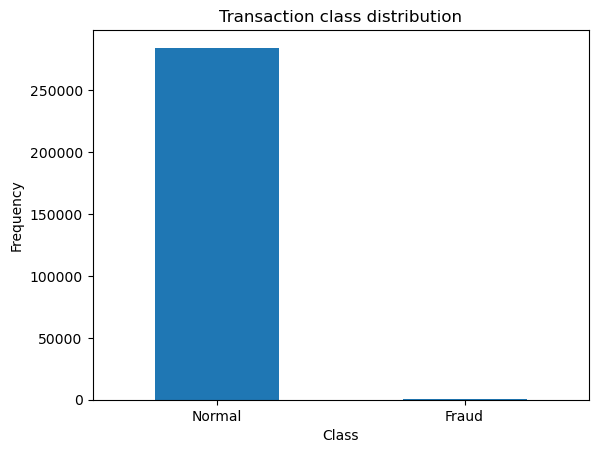

In [5]:
# 트랜잭션 클래스 이름을 "Normal"과 "Fraud"로 정의
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(df['Class'], sort=True)  # 'Class' 열의 값들의 빈도수를 계산하고 내림차순으로 정렬하여 저장
count_classes.plot(kind='bar', rot=0)  # 'Class' 값들의 빈도수를 막대 그래프로 시각화, x축 라벨 각도를 0으로 설정
plt.title("Transaction class distribution")  # 그래프 제목 설정
plt.xticks(range(2), LABELS)  # x축 라벨을 0과 1 대신 'LABELS' 리스트의 "Normal"과 "Fraud"로 지정
plt.xlabel("Class")  # x축에 "Class"라는 라벨 추가
plt.ylabel("Frequency")  # y축에 "Frequency"라는 라벨 추가

#결과적으로 정상거래와 사기거래의 비율을 확인하였다. 당연히 사기거래의 비율이 제일 적다.
#참고로 이 csv에서 class부분이 정상과 사기를 판별한 부분이다.

In [6]:
frauds = df[df.Class == 1]  # df에서 Class 값이 1인 행만 선택해 사기 거래(frauds) 데이터프레임 생성
normal = df[df.Class == 0]  # df에서 Class 값이 0인 행만 선택해 정상 거래(normal) 데이터프레임 생성
frauds.shape  # 사기 거래(frauds) 데이터프레임의 행(row)과 열(column) 개수 확인

#frauds.shape의 결과는 (행 수, 열 수) 형태로 출력되며, 사기 거래의 거래 건수와 특성 수를 알려줍니다.

(492, 31)

In [7]:
normal.shape

(284315, 31)

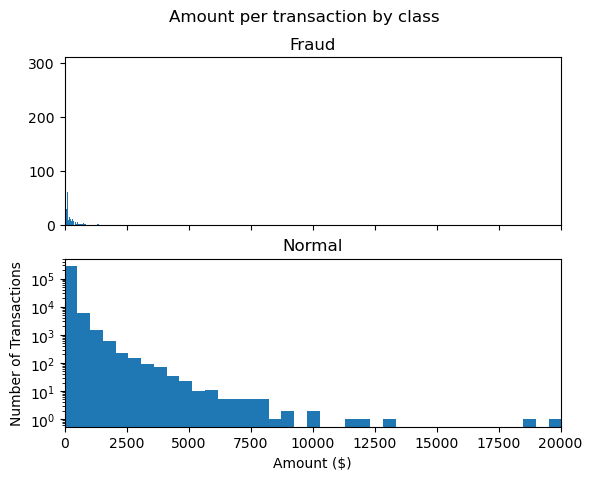

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)  # 2행 1열의 서브플롯을 생성하고, x축을 공유하도록 설정
f.suptitle('Amount per transaction by class')  # 서브플롯 전체에 대한 제목 설정

bins = 50  # 히스토그램에서 사용할 구간(bins) 수를 50으로 설정

ax1.hist(frauds.Amount, bins=bins)  # 사기 거래의 'Amount' 열 데이터를 히스토그램으로 생성
ax1.set_title('Fraud')  # 첫 번째 서브플롯 제목을 'Fraud'로 설정

ax2.hist(normal.Amount, bins=bins)  # 정상 거래의 'Amount' 열 데이터를 히스토그램으로 생성
ax2.set_title('Normal')  # 두 번째 서브플롯 제목을 'Normal'로 설정

plt.xlabel('Amount ($)')  # 전체 x축에 대한 라벨을 'Amount ($)'로 설정
plt.ylabel('Number of Transactions')  # y축 라벨을 'Number of Transactions'로 설정
plt.xlim((0, 20000))  # x축 범위를 0에서 20,000까지로 설정
plt.yscale('log')  # y축을 로그 스케일로 설정하여 거래 수의 차이를 쉽게 확인하도록 함
plt.show()  # 그래프를 출력


#사기 거래와 정상 거래에서 거래 금액(Amount)의 분포를 비교하기 위한 히스토그램을 생성하는 것입니다.
#두 개의 서브플롯을 사용하여 거래 금액의 분포를 각 거래 클래스별로 시각화하고, 로그 스케일을 적용해 거래 수의 큰 차이를 비교하기 쉽게 합

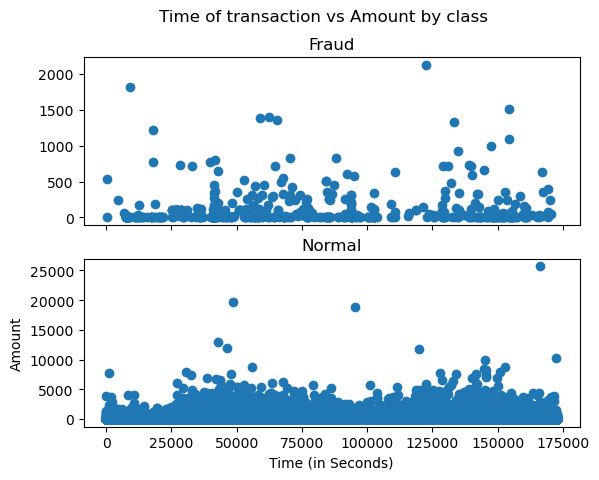

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)  # 2행 1열의 서브플롯 생성, x축을 공유하도록 설정
f.suptitle('Time of transaction vs Amount by class')  # 서브플롯 전체에 대한 제목 설정

ax1.scatter(frauds.Time, frauds.Amount)  # 사기 거래(frauds)의 'Time'과 'Amount' 열 데이터를 산점도로 생성
ax1.set_title('Fraud')  # 첫 번째 서브플롯 제목을 'Fraud'로 설정

ax2.scatter(normal.Time, normal.Amount)  # 정상 거래(normal)의 'Time'과 'Amount' 열 데이터를 산점도로 생성
ax2.set_title('Normal')  # 두 번째 서브플롯 제목을 'Normal'로 설정

plt.xlabel('Time (in Seconds)')  # 전체 x축에 대한 라벨을 'Time (in Seconds)'로 설정
plt.ylabel('Amount')  # y축에 대한 라벨을 'Amount'로 설정
plt.show()  # 그래프 출력



#이 코드는 사기 거래와 정상 거래에서 거래 시간(Time)과 거래 금액(Amount) 간의 관계를 시각화하기 위한 산점도를 생성합니다.
#두 개의 서브플롯을 사용하여 각각의 거래 클래스에서 시간과 금액의 분포를 비교할 수 있도록 구성했습니다.
#x축은 거래 발생 시간을, y축은 거래 금액을 나타냅니다.

In [12]:
from sklearn.preprocessing import StandardScaler  # StandardScaler를 사용하기 위해 scikit-learn에서 불러옴

data = df.drop(['Time'], axis=1)  # 'Time' 열을 제거하여 새로운 데이터프레임(data) 생성

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))  
# 'Amount' 열을 표준화: 평균을 0, 표준편차를 1로 맞춤


#데이터 전처리의 일환으로, 거래 금액(Amount) 값을 표준화하는 과정

#1.StandardScaler 초기화: StandardScaler는 평균을 0, 표준편차를 1로 맞추어 데이터 값을 표준화하는 데 사용됩니다.
#이는 각 특성의 값이 다른 특성과 비교해 과도하게 크거나 작지 않도록 하여 모델 성능을 향상시킵니다.

#2.Time 열 제거: df.drop(['Time'], axis=1)는 분석에 불필요하거나 시계열 정보로 인해 분석에 방해가 될 수 있는 Time 열을 삭제하고,
#그 결과를 data라는 새로운 데이터프레임에 저장합니다.

#3.Amount 열 표준화:

    #3-1 data['Amount'].values.reshape(-1, 1): Amount 열 데이터를 (행, 1열) 형태로 변환합니다.
    #fit_transform은 2차원 배열을 요구하기 때문에 이와 같은 변환이 필요합니다.

    #3-2 StandardScaler().fit_transform(...): fit_transform을 사용하여 Amount의 평균을 0, 표준편차를 1로 조정한 값을 계산하고
    #이를 data['Amount']에 다시 저장합니다.

#이렇듯 표준화된 Amount 값은 모델 훈련 시 다른 특성과 균형을 맞추는 데 유리하게 작용합니다.

In [13]:
RANDOM_SEED = 42  # 무작위성 제어를 위한 랜덤 시드 설정


X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)  
# 데이터를 훈련 세트(X_train)와 테스트 세트(X_test)로 분할, 테스트 세트는 전체의 20%

X_train = X_train[X_train.Class == 0]  # 훈련 세트에서 Class 값이 0(정상 거래)인 행만 선택
X_train = X_train.drop(['Class'], axis=1)  # 훈련 세트에서 Class 열 제거

y_test = X_test['Class']  # 테스트 세트에서 'Class' 열을 따로 저장 (라벨 역할)
X_test = X_test.drop(['Class'], axis=1)  # 테스트 세트에서 'Class' 열 제거

X_train = X_train.values  # 훈련 세트를 numpy 배열 형태로 변환
X_test = X_test.values  # 테스트 세트를 numpy 배열 형태로 변환

X_train.shape  # 훈련 세트 배열의 크기(shape)를 출력


#데이터를 훈련 세트와 테스트 세트로 분할하고,
#특히 훈련 세트에서 """""""정상 거래(Class가 0인 거래)만 사용"""""""""하도록 전처리하는 과정입니다.
#이 과정을 통해 정상 거래의 패턴만을 학습하는 비지도 학습 모델을 준비하는 단계

# 1.사기 거래 데이터는 훈련 세트에서 제외됩니다.
# 2.Class 열은 거래의 레이블(정상 또는 사기)을 나타내지만, 정상 거래의 패턴을 학습할 때는 필요하지 않으므로 제거됩니다.
# 3.테스트 세트에서 ""y_test는 Class 열로만"" 구성되어 있으며, 이는 테스트 단계에서 모델이 정상과 사기 거래를 잘 구분하는지 평가하기 위한 레이블로 사용됩니다.

# 4.X_train.shape: 훈련 세트의 크기(shape)를 확인하기 위한 것입니다. 출력 결과는 (행 수, 열 수) 형태로 나타나며,
#이는 정상 거래 데이터의 개수와 특성(열) 수를 보여줍니다.

(227451, 29)

In [14]:
# 테스트 레이블을 남겨두는 이유는 나중에 정확도를 비교하기 위해서임

In [15]:
# 오토인코더 모델

#정상 거래 데이터에서 패턴을 학습하도록 설계된 신경망 모델입니다.
#오토인코더는 입력 데이터를 인코딩하고, 다시 복원하는 과정을 통해 입력 데이터의 중요한 특징을 추출하고, 이를 바탕으로 입력을 재구성할 수 있습니다.
#오토인코더는 입력 데이터를 저차원 공간으로 압축한 뒤, 이를 다시 원래 차원으로 복원하는 구조로 구성됩니다.
#이 모델은 비지도 학습 방식으로, 주로 이상 탐지(Anomaly Detection) 에 활용되며, 정상 거래의 패턴을 학습하여 사기 거래와 같은 이상치 탐지에 유리합니다.

# 1.입력 차원과 인코딩 차원 정의
input_dim = X_train.shape[1]  # 입력 차원(input_dim)을 설정, 여기서 X_train.shape[1]은 입력 데이터의 열 수, 즉 특성(feature)의 개수

encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값으로, 압축 정도를 조절함)

# 2.모델의 입력층 정의
input_layer = Input(shape=(input_dim,))  # 입력 레이어 정의. Input(shape=(input_dim,)): 입력 레이어를 정의하며, 입력 데이터는 input_dim 개의 특성을 가집니다.

# 3.인코딩 과정
encoded = Dense(encoding_dim, activation='relu')(input_layer)  # 첫 번째 인코딩 레이어
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)  # 두 번째 인코딩 레이어

# *첫 번재 인코딩 레이어
#입력 데이터의 차원을 encoding_dim(14)으로 압축
#첫 번째 인코딩 레이어는 입력을 encoding_dim 크기의 은닉층으로 변환하며, ReLU 활성화 함수를 사용해 비선형성을 부여합니다.

# *두 번째 인코딩 레이어
#두 번째 인코딩 레이어는 은닉층의 크기를 절반(encoding_dim / 2)으로 줄여 더 작은 차원으로 변환합니다.
#이 과정은 입력 데이터를 압축하여 중요한 특징만 추출하게 합니다.

# 4. 디코딩 과정
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)  # 첫 번째 디코딩 레이어
decoded = Dense(input_dim, activation='sigmoid')(decoded)  # 두 번째 디코딩 레이어 (입력 차원으로 복원)

# *첫 번째 디코딩 레이어는 인코딩된 정보를 다시 확장하여 원래의 입력 차원에 가깝게 복원하는 과정입니다.

# *두 번째 디코딩 레이어는 입력과 동일한 차원의 출력을 만들며,
#시그모이드(sigmoid) 활성화 함수를 사용하여 출력을 [0, 1] 사이로 제한합니다.
#이 단계는 재구성된 출력이 원본 입력과 최대한 유사하도록 합니다.

# 5. 오토인코더 모델 구성
autoencoder = Model(inputs=input_layer, outputs=decoded)  # 입력과 출력을 연결해 모델 구성
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')  # Adam 옵티마이저와 MSE 손실 함수로 컴파일

#모델 정의: 입력(input_layer)을 받아 출력(decoded)으로 재구성하는 전체 오토인코더 모델을 정의합니다.

#컴파일: 모델을 컴파일할 때 Adam 옵티마이저를 사용하여 가중치를 업데이트하며,
#평균 제곱 오차(MSE) 손실 함수를 사용합니다. MSE는 입력과 출력 간의 차이를 계산하는 데 적합하며, 재구성 오류가 클수록 손실 값도 커집니다.

#다시 말해, 최적화 알고리즘으로 Adam을 사용하고, 손실 함수로 **평균 제곱 오차(MSE)**를 사용하여 입력과 출력 간의 차이를 최소화하도록 학습합니다.
#learning_rate=0.001로 학습률을 설정해 학습 속도를 조절합니다.

###전체 구조
# 1. 입력 데이터가 인코딩 레이어를 통해 점차 압축됩니다.
# 2. 압축된 데이터는 디코딩 레이어를 거쳐 다시 원래 차원으로 복원됩니다.
# 3. 모델은 입력 데이터와 복원된 데이터 간의 차이(손실)를 최소화하기 위해 학습합니다.
#이 오토인코더는 정상 거래 데이터를 학습하여 재구성하며, 사기 거래와 같은 이상 데이터에서는 재구성 오류가 크게 나타날 수 있습니다.
#이를 통해 사기 거래를 탐지할 수 있습니다.

#다시 말해, 이 오토인코더는 정상 거래 패턴을 학습하여,
#학습 후에는 새로운 입력 데이터가 정상 거래와 유사한지(낮은 재구성 오차) 또는 사기 거래일 가능성이 높은지(높은 재구성 오차) 판별

In [16]:
history = autoencoder.fit(X_train, X_train,  # X_train을 입력과 출력으로 사용하여 입력을 재구성하도록 학습
                          epochs=50,  # 전체 데이터를 50번 반복하여 학습
                          batch_size=256,  # 한 번의 학습에 사용되는 데이터 샘플 수를 256으로 설정
                          shuffle=True,  # 데이터 셔플링을 통해 매 epoch마다 데이터의 순서를 무작위로 변경
                          validation_split=0.1)  # 훈련 데이터의 10%를 검증 데이터로 사용하여 모델 성능 확인


#정의된 오토인코더 모델을 **훈련 데이터(X_train)**를 사용해 학습시키는 단계입니다.
#여기서 오토인코더는 입력 데이터의 패턴을 학습하며, 일부 데이터를 **검증 데이터(validation data)**로 사용하여 과적합을 방지합니다

# 1. X_train, X_train: 오토인코더 모델은 입력과 출력을 동일하게 설정합니다.
#즉, X_train을 입력으로 받아 X_train과 같은 출력을 재구성하도록 학습하는 비지도 학습 방식입니다.

# 2. epochs=50: 에포크 수는 전체 데이터셋을 몇 번 반복하여 학습할지를 결정합니다.
#여기서는 50번 반복하여 학습합니다. 더 높은 에포크 수는 모델이 데이터를 더 많이 학습할 기회를 주지만, 너무 높으면 과적합이 발생할 수 있습니다.

# 3. batch_size=256: 배치 크기는 학습 시 한 번에 처리할 샘플 수를 의미합니다.
#배치 단위로 모델이 가중치를 업데이트하기 때문에, 메모리 사용량을 줄이고 학습 속도를 높이는 효과가 있습니다.
#여기서는 한 번에 256개의 샘플을 사용하여 모델을 학습합니다.

# 4. shuffle=True: **셔플링(shuffle)**은 데이터의 순서를 매 에포크마다 무작위로 섞어 학습하는 방법입니다.
#이로 인해 모델이 특정 데이터 순서에 의존하지 않고 더욱 일반화된 성능을 가지게 됩니다.

# 5. validation_split=0.1: 검증 데이터 비율을 설정하는 인자입니다.
#훈련 데이터(X_train)의 10%를 검증 데이터로 할당하여 모델이 학습 중에 과적합하지 않도록 모델 성능을 평가할 수 있게 합니다.

# 6. 결과 (history)
#history 변수는 각 에포크의 훈련 손실(loss) 및 검증 손실(validation loss) 값과 같은 학습 진행 정보를 저장하며,
#이를 통해 학습이 잘 되었는지 시각화할 수 있습니다.

Epoch 1/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.0884 - val_loss: 0.9032
Epoch 2/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - loss: 0.9023 - val_loss: 0.8816
Epoch 3/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - loss: 0.8876 - val_loss: 0.8705
Epoch 4/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - loss: 0.8883 - val_loss: 0.8649
Epoch 5/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - loss: 0.8813 - val_loss: 0.8612
Epoch 6/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8671 - val_loss: 0.8573
Epoch 7/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - loss: 0.8663 - val_loss: 0.8501
Epoch 8/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - loss: 0.8610 - val_loss: 0.8469
Epoch 9/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step - loss: 0.8580 - val_loss: 0.8440
Epoch 10/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - loss: 0.8634 - val_loss: 0.8414
Epoch 11/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - loss: 0.8443 - val_loss: 0.8389
Epoch 12/50
800/800 ━━━━━━━━━━━━━━

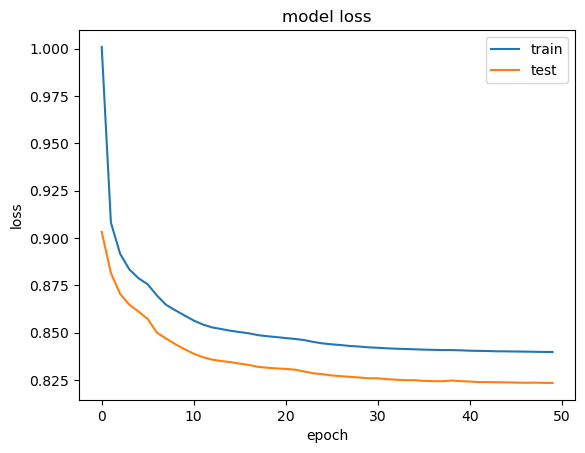

In [17]:
plt.plot(history.history['loss'])  # 훈련 데이터에서의 손실 값('loss')을 에포크별로 플롯으로 시각화
plt.plot(history.history['val_loss'])  # 검증 데이터에서의 손실 값('val_loss')을 에포크별로 플롯으로 시각화
plt.title('model loss')  # 그래프 제목을 'model loss'로 설정
plt.ylabel('loss')  # y축 라벨을 'loss'로 설정하여 손실 값을 나타냄
plt.xlabel('epoch')  # x축 라벨을 'epoch'로 설정하여 에포크 수를 나타냄
plt.legend(['train', 'test'], loc='upper right')  # 범례 추가, 훈련 데이터는 'train', 검증 데이터는 'test'로 지정, 위치는 오른쪽 상단에 설정


#이 코드는 **모델 학습 손실(loss)**을 시각화하여 학습 과정에서 훈련 손실과 검증 손실이 어떻게 변화하는지 보여줍니다.
#이를 통해 모델의 학습 패턴을 확인하고, 과적합 여부 등을 파악할 수 있습니다.

#훈련 손실(loss): plt.plot(history.history['loss'])는 매 에포크마다 훈련 데이터에서 계산된 손실 값을 시각화하여,
#모델이 학습 중 얼마나 잘 맞추고 있는지 보여줍니다.

#검증 손실(val_loss): plt.plot(history.history['val_loss'])는 검증 데이터에 대한 손실 값 변화를 시각화하여,
#모델이 새로운 데이터에 대해서도 얼마나 잘 일반화되고 있는지 확인할 수 있게 합니다.

#훈련 손실이 점점 낮아진다면, 모델이 데이터의 패턴을 학습하고 있다는 의미입니다.
#검증 손실이 낮아지다가 어느 순간부터 증가하는 경우, **과적합(overfitting)**이 발생했을 가능성이 큽니다.

###### 사실 엄밀히 말하면 test가 아니라 val_loss라고 하는게 올바른 표현이라 볼 수 있겠습니다.

In [18]:
predictions = autoencoder.predict(X_test)  # 테스트 데이터를 입력으로 하여 오토인코더 모델이 재구성한 값(predictions)을 생성
mse = np.mean(np.power(X_test - predictions, 2), axis=1)  # 재구성 오차 계산: (X_test - predictions)의 제곱을 평균내어 MSE 계산
error_df = pd.DataFrame({'reconstruction_error': mse,  # 재구성 오차(MSE)를 'reconstruction_error' 열로, 실제 클래스를 'true_class' 열로 데이터프레임 생성
                         'true_class': y_test})
error_df.describe()  # error_df 데이터프레임의 요약 통계 정보를 출력하여 재구성 오차 분포를 확인


#오토인코더 모델을 이용해 테스트 데이터(X_test)의 재구성 오차를 계산하고, 이 오차를 통해 정상 거래와 사기 거래를 구분할 수 있는지 분석하는 과정

# 1. predictions: X_test를 오토인코더에 입력하여 모델이 재구성한 값입니다. 오토인코더는 정상 거래 패턴을 학습했기 때문에,
#정상 거래는 비교적 낮은 오차로 재구성되지만, """"""사기 거래는 높은 오차를 보일 가능성"""""""""이 있습니다.

# 2. mse (재구성 오차):
#각 샘플에 대해 **원본 데이터(X_test)와 재구성된 데이터(predictions) 간의 차이의 제곱을 평균(MSE)**하여 오차를 계산합니다.#
#사기 거래의 경우 모델이 제대로 재구성하지 못해 높은 오차 값이 나올 가능성이 높습니다.

#여기서 **mse**는 단순히 변수 이름일 뿐입니다. 이 변수는 **재구성 오차(Mean Squared Error, MSE)**를 계산한 값을 저장할 뿐, 꼭 MSE라는 이름이 아니어도 됩니다.
#코드에서 **mse**라는 이름을 사용한 이유는 이 값이 평균 제곱 오차(MSE) 방식으로 계산된 재구성 오차이기 때문입니다.
#그러나 mse 대신 reconstruction_error나 errors 등으로 변수 이름을 바꿔도 코드의 기능은 동일하게 작동합니다.


# 3. error_df 데이터프레임:
#reconstruction_error: 각 샘플의 재구성 오차 값을 담고 있습니다.
#true_class: 각 샘플의 실제 클래스(y_test)로, 이 샘플이 정상 거래(0)인지 사기 거래(1)인지를 나타냅니다.

# 4. error_df.describe():
#reconstruction_error와 true_class의 요약 통계 정보를 보여줍니다.
#이 정보를 통해 재구성 오차의 평균, 분포 등을 확인하고, 정상 거래와 사기 거래 간의 오차 분포 차이를 분석할 수 있습니다.

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step


,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.865530,0.001720
std,3.715238,0.041443
min,0.058190,0.000000
25%,0.266257,0.000000
50%,0.454391,0.000000
75%,0.733268,0.000000
max,258.851274,1.000000


In [ ]:
#통계 정보 분석
# true_class의 분포:
# mean 값이 0.00172로 매우 작고, min이 0, max가 1인 것으로 보아, 전체 데이터 중 사기 거래가 극히 소수임을 알 수 있습니다.
# mean은 true_class가 1(사기 거래)인 비율을 의미하므로, 전체의 0.172% 정도가 사기 거래입니다.

# reconstruction_error의 분포:
# 평균 재구성 오차(mean)가 0.865로 정상 거래에 비해 상대적으로 낮은 오차임을 보여줍니다.
# 최대값(max)이 258.85로, 일부 데이터의 재구성 오차가 매우 크다는 것을 알 수 있습니다. 이는 사기 거래에서 나타난 높은 재구성 오차일 가능성이 큽니다.
# 하위 75%(75%)의 재구성 오차가 0.733 정도로 낮은 수준에서 나타나며,
# 대부분의 정상 거래에서 발생하는 낮은 오차와 비교해 사기 거래일 때는 재구성 오차가 더 크다는 차이를 볼 수 있습니다.

# 결과 해석
# 이 결과는 재구성 오차(reconstruction_error)가 높은 값일수록 사기 거래일 가능성이 높다는 것을 시사합니다.
# 정상 거래와 사기 거래 간의 재구성 오차 분포에 차이가 존재하므로,
# 재구성 오차가 특정 임계값(threshold)을 넘는 경우 사기 거래로 판단할 수 있는 가능성을 보여줍니다.

#요약하면, 재구성 오차의 분포가 정상 거래와 사기 거래 간에 명확한 차이를 보이므로 사기 거래 탐지 모델로서 오토인코더가 적절하게 학습되었을 가능성이 있습니다.


#cf.

#std (표준 편차, Standard Deviation)
#**표준 편차(std)**는 데이터가 평균값(mean)을 중심으로 얼마나 퍼져 있는지를 나타내는 지표입니다.
#값이 클수록 데이터가 널리 분포해 있고, 값이 작을수록 데이터가 평균에 가까이 모여 있다는 뜻입니다.
#여기서 **std**는 reconstruction_error의 표준 편차가 3.715로 계산되었는데, 이는 일부 재구성 오차 값들이 평균에서 멀리 떨어져 있다는 것을 의미합니다.
#사기 거래 데이터가 극히 일부지만 높은 오차를 나타내는 경우, 전체 재구성 오차의 분포를 넓히는 데 기여했을 가능성이 있습니다.

#하위 75% (3분위수, 75th Percentile)
#**하위 75% (3분위수)**는 데이터의 상위 25%를 제외한 나머지 하위 75%의 값 범위를 의미합니다. 여기서는 reconstruction_error의 75% 지점 값이 0.733로 나타났습니다.
#즉, 재구성 오차 값 중 하위 75%의 데이터는 0.733 이하의 값으로 분포하고 있음을 의미합니다.
#이는 전체 데이터 중 재구성 오차가 낮은 75%의 데이터(대부분 정상 거래)는 0.733 이하의 오차를 가지고 있다는 뜻이므로,
#이 값을 사기 거래 탐지 임계값의 기준으로 활용할 수도 있습니다.

In [19]:
error_df.head() #처음 5개 행 출력한 거

#reconstruction_error: 이 열은 오토인코더 모델이 해당 거래를 재구성한 후 원본 거래와의 차이를 나타내는 오차입니다. 
#값이 높을수록 모델이 해당 거래를 정상적으로 재구성하지 못했다는 의미로, 사기 거래일 가능성이 큽니다.

#true_class: 이 열은 거래가 **정상 거래(0)**인지 **사기 거래(1)**인지 실제 레이블을 나타냅니다.

,reconstruction_error,true_class
43428,81.996461,1
49906,0.782502,0
29474,0.308807,0
276481,0.409654,0
278846,0.220932,0


In [20]:
threshold = 15#는 재구성 오차(reconstruction_error)의 임계값을 15로 설정한 것으로, 이를 통해 사기 거래와 정상 거래를 구분하는 기준을 만듭니다.

# 임계값(threshold)의 역할
#재구성 오차가 임계값을 초과하면 사기 거래로 간주하고, 초과하지 않으면 정상 거래로 간주하게 됩니다.
#여기서 threshold = 15로 설정되었으므로, 재구성 오차가 15 이상인 거래는 사기 거래로, 15 미만인 거래는 정상 거래로 판단합니다.

#임계값(threshold)은 주로 재구성 오차의 분포를 분석한 그래프를 통해 결정됩니다.

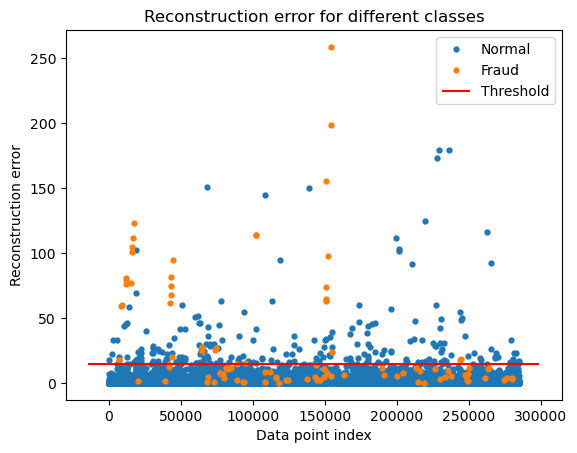

In [21]:
groups = error_df.groupby('true_class')  # `true_class`를 기준으로 정상 거래(0)와 사기 거래(1)로 데이터를 그룹화
fig, ax = plt.subplots()  # 새로운 그래프와 축을 생성

#루프 내의 시각화 작업
for name, group in groups:  # 정상 거래와 사기 거래 그룹에 대해 반복
    ax.plot(group.index, group.reconstruction_error,  # 각 거래의 인덱스와 재구성 오차를 y축에 플로팅
            marker='o', ms=3.5, linestyle='',  # 점 모양으로 표시, 마커 크기(ms)는 3.5, 선 스타일은 없음
            label="Fraud" if name == 1 else "Normal")  # 그룹이 사기 거래(1)면 'Fraud', 정상 거래(0)면 'Normal'로 라벨

#입계값 시각화
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')  
# `threshold` 값을 기준으로 수평선(hline)을 그려 임계값을 시각화
# x축의 범위(`ax.get_xlim()`)에 따라 선을 그림. 색은 빨간색('r')으로 설정하고, 범례에 'Threshold'로 라벨


#제목, 축 레이블, 범례 설정 및 출력
ax.legend()  # 범례 표시
plt.title("Reconstruction error for different classes")  # 그래프 제목 설정
plt.ylabel("Reconstruction error")  # y축 라벨 설정
plt.xlabel("Data point index")  # x축 라벨 설정
plt.show()  # 그래프 출력


#재구성 오차(reconstruction_error)를 시각화하여 정상 거래와 사기 거래의 오차 분포를 확인하고, 임계값(threshold)을 기준으로 사기 거래를 구분하는지 보여줍니다.


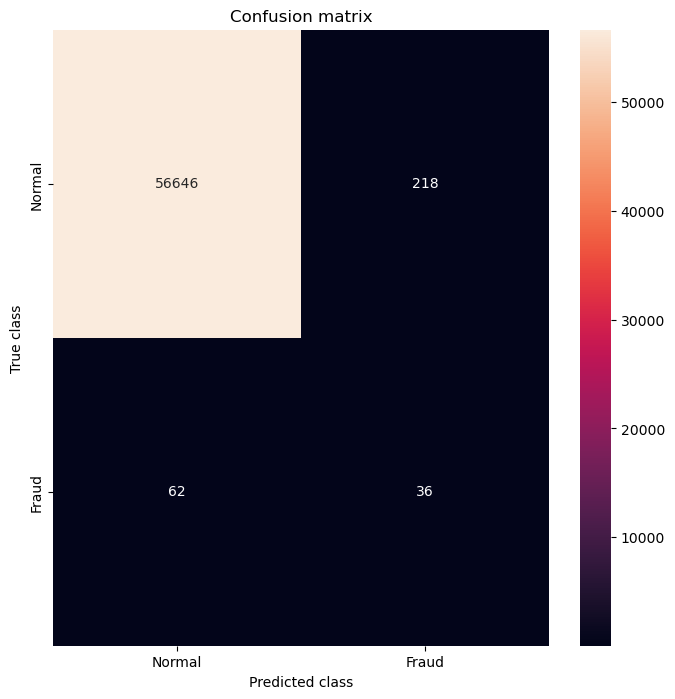

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.14      0.37      0.20        98

    accuracy                           1.00     56962
   macro avg       0.57      0.68      0.60     56962
weighted avg       1.00      1.00      1.00     56962



In [22]:
#**혼동 행렬(confusion matrix)**과 **분류 성능 보고서(classification report)**를 생성하여
#임계값(threshold)을 기준으로 정상 거래와 사기 거래의 분류 성능을 평가하는 과정

from sklearn.metrics import confusion_matrix, classification_report  # 혼동 행렬과 분류 보고서 생성 함수를 불러옴
import seaborn as sns  # 데이터 시각화를 위한 라이브러리 Seaborn 불러옴



#예측 생성 및 혼동 행렬 계산

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]  
# 각 거래의 재구성 오차가 threshold(15)보다 크면 1(사기 거래)로, 작거나 같으면 0(정상 거래)로 예측하여 리스트 생성
conf_matrix = confusion_matrix(error_df.true_class, y_pred)  
# 실제 클래스(실제 값)(`true_class`)와 예측 값(`y_pred`) 간의 혼동 행렬 생성



#혼동 행렬 시각화
plt.figure(figsize=(8, 8))  # 플롯 크기를 8x8로 설정
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")  
# Seaborn의 heatmap으로 혼동 행렬을 시각화. x축, y축 라벨로 LABELS("Normal", "Fraud") 지정, 숫자 표기
plt.title("Confusion matrix")  # 그래프 제목 설정
plt.ylabel('True class')  # y축 라벨을 'True class'로 설정
plt.xlabel('Predicted class')  # x축 라벨을 'Predicted class'로 설정
plt.show()  # 그래프 출력

#혼동 행렬 히트맵: 정상 거래(Normal)와 사기 거래(Fraud)의 분류 결과를 히트맵 형태로 시각화합니다.
#대각선(왼쪽 상단과 오른쪽 하단)의 숫자가 높을수록 정확하게 예측된 샘플이 많다는 의미입니다.
#대각선이 아닌 값이 높을수록 잘못 예측된 오류가 많다는 것을 나타냅니다.


#분류 성능 보고서 출력
print(classification_report(error_df.true_class, y_pred))  
# 실제 값과 예측 값(`y_pred`)을 비교하여 정확도, 정밀도, 재현율, F1 점수 등 성능 지표를 출력

#정밀도(precision): 사기로 예측된 것 중 실제로 사기 거래인 비율을 의미합니다.
#재현율(recall): 실제 사기 거래 중에서 모델이 정확히 예측한 비율입니다.
#F1 점수(F1 score): 정밀도와 재현율의 조화 평균으로, 불균형한 데이터에서 성능을 종합적으로 평가할 수 있습니다.

In [23]:
"
각 항목의 해석
Class 0 (정상 거래):

정밀도(precision): 1.00 - 모델이 정상 거래로 예측한 것 중에서 실제 정상 거래일 비율이 100%입니다.
재현율(recall): 1.00 - 실제 정상 거래 중에서 모델이 정확히 정상 거래로 예측한 비율이 100%입니다.
F1 점수: 1.00 - 정밀도와 재현율이 모두 높기 때문에 F1 점수도 1.00으로 완벽한 예측을 보여줍니다.


Class 1 (사기 거래):

정밀도(precision): 0.14 - 모델이 사기 거래로 예측한 것 중 실제 사기 거래인 비율이 14%입니다. 즉, 모델이 사기 거래를 잘못 예측하는 경우가 많다는 의미입니다.
재현율(recall): 0.37 - 실제 사기 거래 중에서 모델이 정확히 사기 거래로 예측한 비율이 37%로, 낮은 편입니다.
F1 점수: 0.20 - 정밀도와 재현율이 모두 낮기 때문에 F1 점수도 낮습니다.

    
전체 성능 (accuracy, macro avg, weighted avg):

정확도(accuracy): 1.00 - 전체 데이터 중에서 맞게 예측된 비율이 100%입니다. 그러나, 정확도가 높더라도 불균형한 데이터셋에서 의미가 제한적입니다.
Macro avg: 클래스별 정밀도, 재현율, F1 점수의 단순 평균입니다. 사기 거래 클래스의 성능이 낮아 macro avg 점수도 낮게 나타납니다.
Weighted avg: 클래스별 성능 지표에 각각의 클래스 크기를 반영한 가중 평균입니다. 정상 거래 데이터가 많기 때문에 weighted avg가 전체적으로 높습니다.

문제 원인
데이터 불균형: 정상 거래가 압도적으로 많기 때문에 모델이 사기 거래를 적절히 학습하지 못하고 정상 거래로 예측하는 경향이 있습니다.
임계값 조정 필요: threshold 값을 조정하거나 추가적인 모델 조정을 통해 사기 거래 탐지 성능을 개선할 필요가 있습니다.

개선 방법
임계값 조정: threshold를 낮추어 사기 거래를 더 많이 탐지하도록 조정해볼 수 있습니다.
불균형 데이터 처리: 오버샘플링(SMOTE 등) 또는 언더샘플링을 통해 데이터의 불균형을 완화하거나,
비용 민감 학습(cost-sensitive learning)을 통해 모델이 사기 거래 탐지에 더 집중하도록 할 수 있습니다.
"

SyntaxError: unterminated string literal (detected at line 1) (2291211211.py, line 1)